# Подготовка обучающей и тестовой выборки, кросс-валидация и подбор гиперпараметров на примере метода ближайших соседей.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
%matplotlib inline 
sns.set(style="ticks")

In [2]:
dataset = pd.read_csv('datasets/Iris.csv')

In [3]:
dataset.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [4]:
print('Размер датасета:', dataset.shape[0], 'x', dataset.shape[1])

Размер датасета: 150 x 6


In [5]:
data_train, data_test = train_test_split(dataset, test_size=0.33, random_state=42)

In [6]:
data_train.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
96,97,5.7,2.9,4.2,1.3,Iris-versicolor
105,106,7.6,3.0,6.6,2.1,Iris-virginica
66,67,5.6,3.0,4.5,1.5,Iris-versicolor
0,1,5.1,3.5,1.4,0.2,Iris-setosa
122,123,7.7,2.8,6.7,2.0,Iris-virginica


In [7]:
print('Размер обучающей выборки:', data_train.shape[0], 'x', data_train.shape[1])

Размер обучающей выборки: 100 x 6


In [8]:
data_test.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
73,74,6.1,2.8,4.7,1.2,Iris-versicolor
18,19,5.7,3.8,1.7,0.3,Iris-setosa
118,119,7.7,2.6,6.9,2.3,Iris-virginica
78,79,6.0,2.9,4.5,1.5,Iris-versicolor
76,77,6.8,2.8,4.8,1.4,Iris-versicolor


In [9]:
print('Размер тестовой выборки:', data_test.shape[0], 'x', data_test.shape[1])

Размер тестовой выборки: 50 x 6


# Регрессия

In [10]:
KNeighborsRegressorObj = KNeighborsRegressor(n_neighbors=3)
KNeighborsRegressorObj

KNeighborsRegressor(n_neighbors=3)

### K = 3

In [30]:
KNeighborsRegressorObj.fit(data_train[['SepalLengthCm','PetalLengthCm']], data_train['PetalWidthCm'])
values_k3 = KNeighborsRegressorObj.predict(data_test[['SepalLengthCm','PetalLengthCm']])
print(values_k3)

[1.53333333 0.26666667 2.1        1.36666667 1.53333333 0.2
 1.13333333 1.76666667 1.33333333 1.16666667 2.         0.16666667
 0.2        0.13333333 0.26666667 1.7        2.33333333 1.23333333
 1.4        2.         0.13333333 1.7        0.33333333 2.
 2.1        1.93333333 2.33333333 2.3        0.16666667 0.26666667
 0.2        0.2        1.36666667 0.26666667 0.23333333 1.7
 1.36666667 0.2        0.23333333 0.2        2.03333333 1.36666667
 1.43333333 0.2        0.2        1.13333333 1.76666667 2.
 1.36666667 1.93333333]


### K = 5

In [35]:
K = 5

knn = KNeighborsRegressor(K)
values_k5 = knn.fit(data_train[['SepalLengthCm','PetalLengthCm']], data_train['PetalWidthCm']).predict(data_test[['SepalLengthCm','PetalLengthCm']])

print(values_k5)

[1.64 0.24 2.08 1.44 1.48 0.24 1.18 1.74 1.34 1.16 1.94 0.18 0.2  0.24
 0.24 1.6  2.24 1.26 1.34 2.04 0.18 1.68 0.34 2.04 2.1  2.   2.28 2.28
 0.18 0.24 0.22 0.24 1.36 0.24 0.24 1.72 1.34 0.24 0.24 0.24 1.94 1.44
 1.48 0.22 0.24 1.22 1.9  2.04 1.34 1.84]


### Кодирование категориальных признаков

In [21]:
from sklearn.preprocessing import OrdinalEncoder

dt = data_train[['SepalLengthCm','PetalLengthCm', 'Species']]
ord_enc = OrdinalEncoder()
new_column = ord_enc.fit_transform(dt[['Species']])
dt = dt.drop(columns=['Species'], axis=1)
dt['Species'] = new_column
dt.head(5)

,SepalLengthCm,PetalLengthCm,Species
96,5.7,4.2,1.0
105,7.6,6.6,2.0
66,5.6,4.5,1.0
0,5.1,1.4,0.0
122,7.7,6.7,2.0


<Axes: xlabel='SepalLengthCm', ylabel='PetalLengthCm'>

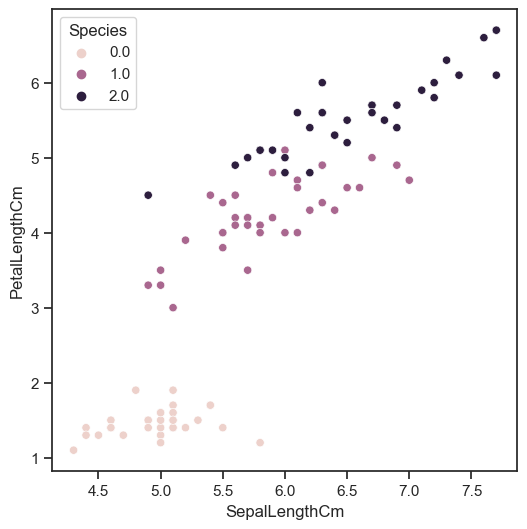

In [22]:
fig, ax = plt.subplots(figsize=(6, 6))
sns.scatterplot(ax=ax, x="SepalLengthCm", y="PetalLengthCm", data=dt, hue="Species")

### График тестовой выборки при K = 3

<Axes: xlabel='SepalLengthCm', ylabel='PetalLengthCm'>

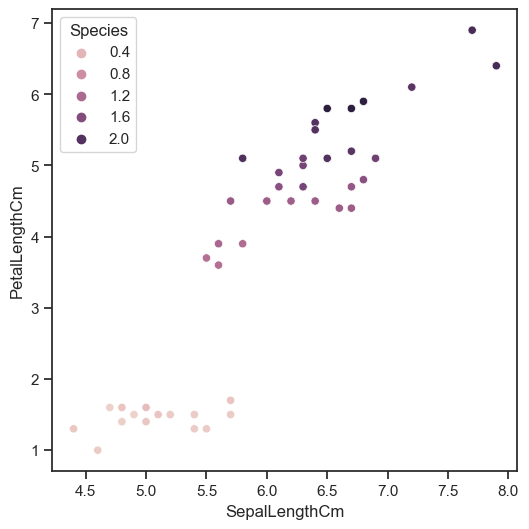

In [32]:
dtK3 = data_test[['SepalLengthCm','PetalLengthCm', 'Species']]
dtK3 = dtK3.drop(columns=['Species'], axis=1)
dtK3['Species'] = values_k3

fig, ax = plt.subplots(figsize=(6, 6))
sns.scatterplot(ax=ax, x="SepalLengthCm", y="PetalLengthCm", data=dtK3, hue="Species")

### График тестовой выборки при K = 5

<Axes: xlabel='SepalLengthCm', ylabel='PetalLengthCm'>

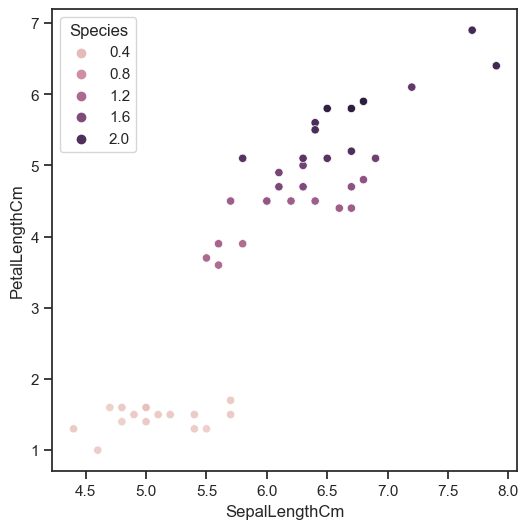

In [36]:
dtK5 = data_test[['SepalLengthCm','PetalLengthCm', 'Species']]
dtK5 = dtK5.drop(columns=['Species'], axis=1)
dtK5['Species'] = values_k5

fig, ax = plt.subplots(figsize=(6, 6))
sns.scatterplot(ax=ax, x="SepalLengthCm", y="PetalLengthCm", data=dtK5, hue="Species")